# CodeChallenge: Fixed vs. Dynamic Learning Rate
This Document will cover:
- Learn that the model learning rate does not need to have a static value
- Think about different ways to change the learning rate, and when certain mathods can fail

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [12]:
# Define a Range for x
x = np.linspace(-2, 2, 2001)

# Function (as a function)
def fx(x):
    return 3*x**2 - 3*x + 4

# Derivative Function
def deriv(x):
    return 6*x - 3

### G.D. using a fixed learning rate

In [13]:
# Random Starting Point
localmin = np.random.choice(x,1)
initval = localmin[:] # Store the Initial Value

# Learning Parameters
learning_rate = .01
training_epochs = 50

# Set Loop Iterations to 0, Run through training and store all the results
i=0; ii=0;
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
    # compute gradient
    grad = deriv(localmin)

    # non-adaptive learning rate
    lr = learning_rate

    # update parameter according to g.d.
    localmin = localmin - lr*grad

    # store the parameters
    modelparamsFixed[i,0] = localmin
    modelparamsFixed[i,1] = grad
    modelparamsFixed[i,2] = lr
print(modelparamsFixed)

[[-1.42324000e+00 -1.22760000e+01  1.00000000e-02]
 [-1.30784560e+00 -1.15394400e+01  1.00000000e-02]
 [-1.19937486e+00 -1.08470736e+01  1.00000000e-02]
 [-1.09741237e+00 -1.01962492e+01  1.00000000e-02]
 [-1.00156763e+00 -9.58447423e+00  1.00000000e-02]
 [-9.11473572e-01 -9.00940578e+00  1.00000000e-02]
 [-8.26785158e-01 -8.46884143e+00  1.00000000e-02]
 [-7.47178048e-01 -7.96071095e+00  1.00000000e-02]
 [-6.72347365e-01 -7.48306829e+00  1.00000000e-02]
 [-6.02006523e-01 -7.03408419e+00  1.00000000e-02]
 [-5.35886132e-01 -6.61203914e+00  1.00000000e-02]
 [-4.73732964e-01 -6.21531679e+00  1.00000000e-02]
 [-4.15308986e-01 -5.84239778e+00  1.00000000e-02]
 [-3.60390447e-01 -5.49185392e+00  1.00000000e-02]
 [-3.08767020e-01 -5.16234268e+00  1.00000000e-02]
 [-2.60240999e-01 -4.85260212e+00  1.00000000e-02]
 [-2.14626539e-01 -4.56144599e+00  1.00000000e-02]
 [-1.71748947e-01 -4.28775923e+00  1.00000000e-02]
 [-1.31444010e-01 -4.03049368e+00  1.00000000e-02]
 [-9.35573694e-02 -3.78866406e+

C:\Users\xande\AppData\Local\Temp\ipykernel_11084\211416042.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,0] = localmin
C:\Users\xande\AppData\Local\Temp\ipykernel_11084\211416042.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,1] = grad


#### G.D. using gradient-based learning rate

In [14]:
# Random Starting Point
localmin = np.random.choice(x,1)
initval = localmin[:]

# Learning Parameters
learning_rate = .01
training_epochs = 50

# Set Loop Iterations to 0, Run through training and store all the results
i=0; ii=0;
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):

    # compute gradient
    grad = deriv(localmin)

    # adapt the learning rate according to the gradient
    lr = learning_rate*np.abs(grad)

    # update parameter according to g.d.
    localmin = localmin - lr*grad

    # store the parameters
    modelparamsGrad[i,0] = localmin
    modelparamsGrad[i,1] = grad
    modelparamsGrad[i,2] = lr
print(modelparamsGrad)

[[ 1.15536000e-03 -1.27560000e+01  1.27560000e-01]
 [ 9.07399109e-02 -2.99306784e+00  2.99306784e-02]
 [ 1.51037686e-01 -2.45556053e+00  2.45556053e-02]
 [ 1.94876577e-01 -2.09377388e+00  2.09377388e-02]
 [ 2.28392686e-01 -1.83074054e+00  1.83074054e-02]
 [ 2.54950078e-01 -1.62964388e+00  1.62964388e-02]
 [ 2.76567885e-01 -1.47029953e+00  1.47029953e-02]
 [ 2.94539773e-01 -1.34059269e+00  1.34059269e-02]
 [ 3.09736779e-01 -1.23276136e+00  1.23276136e-02]
 [ 3.22768812e-01 -1.14157933e+00  1.14157933e-02]
 [ 3.34076734e-01 -1.06338713e+00  1.06338713e-02]
 [ 3.43987725e-01 -9.95539596e-01  9.95539596e-03]
 [ 3.52750064e-01 -9.36073651e-01  9.36073651e-03]
 [ 3.60555779e-01 -8.83499618e-01  8.83499618e-03]
 [ 3.67555868e-01 -8.36665324e-01  8.36665324e-03]
 [ 3.73870789e-01 -7.94664792e-01  7.94664792e-03]
 [ 3.79597877e-01 -7.56775264e-01  7.56775264e-03]
 [ 3.84816679e-01 -7.22412736e-01  7.22412736e-03]
 [ 3.89592870e-01 -6.91099926e-01  6.91099926e-03]
 [ 3.93981174e-01 -6.62442780e-

C:\Users\xande\AppData\Local\Temp\ipykernel_11084\3096311382.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
C:\Users\xande\AppData\Local\Temp\ipykernel_11084\3096311382.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
C:\Users\xande\AppData\Local\Temp\ipykernel_11084\3096311382.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


#### G.D. using a time-based learning rate

In [15]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr
print(modelparamsTime)

[[-3.75912000e-01 -1.27560000e+01  9.80000000e-02]
 [ 1.28613312e-01 -5.25547200e+00  9.60000000e-02]
 [ 3.38075404e-01 -2.22832013e+00  9.40000000e-02]
 [ 4.27457781e-01 -9.71547576e-01  9.20000000e-02]
 [ 4.66630579e-01 -4.35253314e-01  9.00000000e-02]
 [ 4.84249633e-01 -2.00216524e-01  8.80000000e-02]
 [ 4.92376823e-01 -9.45021995e-02  8.60000000e-02]
 [ 4.96218904e-01 -4.57390646e-02  8.40000000e-02]
 [ 4.98079203e-01 -2.26865760e-02  8.20000000e-02]
 [ 4.99001186e-01 -1.15247806e-02  8.00000000e-02]
 [ 4.99468631e-01 -5.99288592e-03  7.80000000e-02]
 [ 4.99710935e-01 -3.18821531e-03  7.60000000e-02]
 [ 4.99839280e-01 -1.73438913e-03  7.40000000e-02]
 [ 4.99908711e-01 -9.64320356e-04  7.20000000e-02]
 [ 4.99947052e-01 -5.47733962e-04  7.00000000e-02]
 [ 4.99968655e-01 -3.17685698e-04  6.80000000e-02]
 [ 4.99981068e-01 -1.88069933e-04  6.60000000e-02]
 [ 4.99988338e-01 -1.13594240e-04  6.40000000e-02]
 [ 4.99992676e-01 -6.99740516e-05  6.20000000e-02]
 [ 4.99995313e-01 -4.39437044e-

C:\Users\xande\AppData\Local\Temp\ipykernel_11084\534989916.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,0] = localmin
C:\Users\xande\AppData\Local\Temp\ipykernel_11084\534989916.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,1] = grad


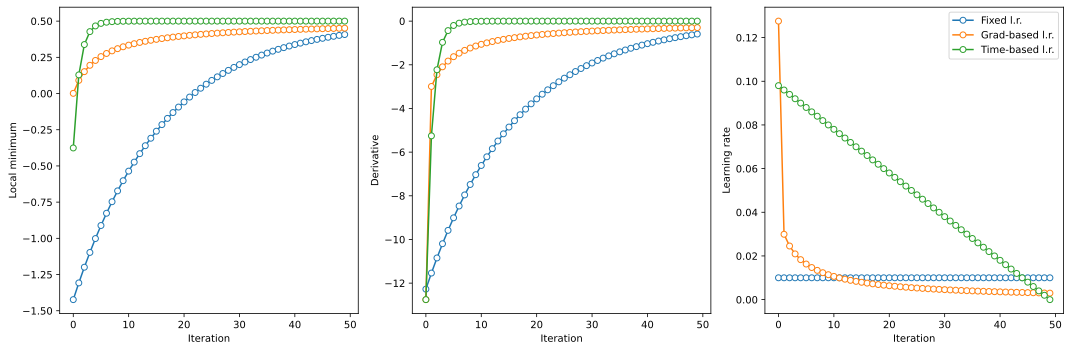

In [16]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()